# An Investigation of US Flights from 2008
## by Carlie Badder

## Investigation Overview

> The flight data may provide insight into what time of year to avoid traveling within the US based on delays and cancellations. We can also investigate where, or which airports, offer the best (or worst) flight experiences based on similar issues. Additionally, it may be interesting to understand why flights that are cancelled get cancelled and how long a delay take before becoming a cancellation.

## Dataset Overview

> This data consists of about 7 million flights that were scheduled to occur in the US during the year 2008. Various features describing each flight include scheduled and actual departure and arrival datetimes, origin and destination airports, distance traveled, cancellation details, and more. The dataset can be found [here](http://stat-computing.org/dataexpo/2009/the-data.html), with supplementary airport and carrier codes and other additional details found [here](http://stat-computing.org/dataexpo/2009/supplemental-data.html). 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [38]:
# load in the dataset into a pandas dataframe
df_full = pd.read_csv('cleaned_flights.csv')
df_full = df_full.drop(columns=['Unnamed: 0'])
df_full.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Org_Dest,CRSDepTimeHour
0,2008,1,3,4,20:03:00,19:55:00,22:11:00,22:25:00,WN,335,...,0,E,0,0.0,0.0,0.0,0.0,0.0,IAD_TPA,19
1,2008,1,3,4,07:54:00,07:35:00,10:02:00,10:00:00,WN,3231,...,0,E,0,0.0,0.0,0.0,0.0,0.0,IAD_TPA,7
2,2008,1,3,4,06:28:00,06:20:00,08:04:00,07:50:00,WN,448,...,0,E,0,0.0,0.0,0.0,0.0,0.0,IND_BWI,6
3,2008,1,3,4,09:26:00,09:30:00,10:54:00,11:00:00,WN,1746,...,0,E,0,0.0,0.0,0.0,0.0,0.0,IND_BWI,9
4,2008,1,3,4,18:29:00,17:55:00,19:59:00,19:25:00,WN,3920,...,0,E,0,2.0,0.0,0.0,0.0,32.0,IND_BWI,17


## How Many Cancelled Flights?

> First off, how many flights were actually cancelled in 2008?

In [194]:
base_color = sb.color_palette()[0]
# add annotations
n = df_full.shape[0]
cat_counts = df_full['Cancelled'].value_counts()

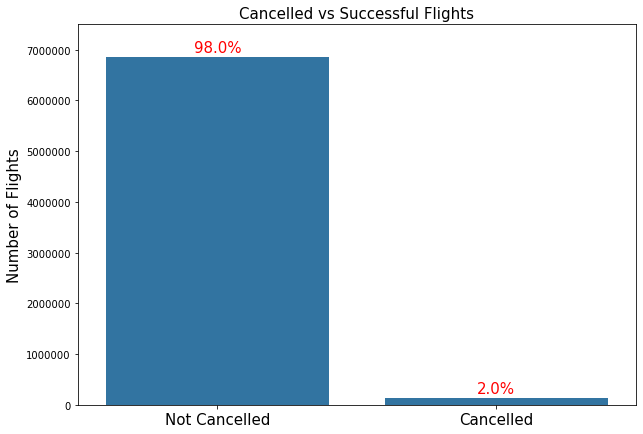

In [197]:
plt.figure(figsize=(10,7))
ax = sb.countplot(data = df_full, x = 'Cancelled', color = base_color);
plt.ylim([0, 7500000]); locs, labels = plt.xticks() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = cat_counts[int(label.get_text())]
    ct_string = '{:0.1f}%'.format(count/n*100)
    plt.text(loc, count+100000, ct_string, 
             ha = 'center', color = 'r',
            fontsize=15)
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'], fontsize=15); plt.ylabel('Number of Flights', fontsize=15); plt.xlabel('');plt.title('Cancelled vs Successful Flights', fontsize=15);

In [42]:
# focus on only the top 15 origin airports by flight volume
top15 = df_full.Origin.value_counts().sort_values(ascending=False)[0:15].index
print(top15)
df = df_full.copy()
df = df[df.Origin.isin(top15)]
df.shape

Index(['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'PHX', 'IAH', 'LAS', 'DTW', 'SFO',
       'SLC', 'EWR', 'MCO', 'MSP', 'CLT'],
      dtype='object')


(3020870, 31)

### Let's Focus on the Top 15 Airports by Departure Flight Volume
**ATL, ORD, DFW, DEN, LAX, PHX, IAH, LAS, DTW, SFO, SLC, EWR, MCO, MSP, CLT**

This gives us a smaller number of locations to work with, but maintains the distribution of cancelled vs not cancelled flights.

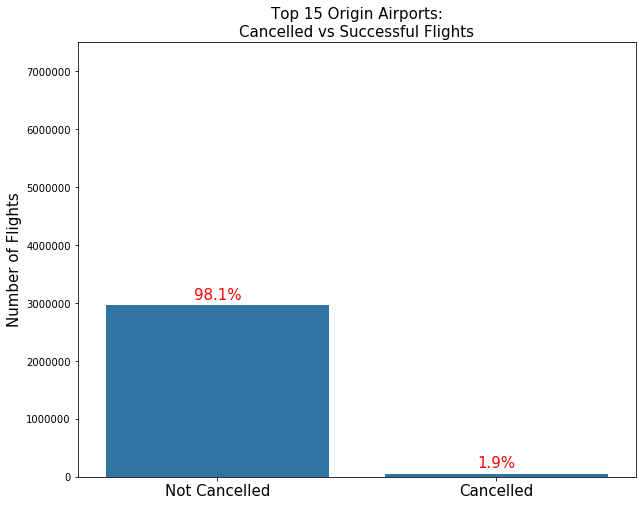

In [43]:
plt.figure(figsize=(10,8))
ax = sb.countplot(data = df, x = 'Cancelled', 
             color = base_color);
plt.ylim([0, 7500000])
n = df.shape[0] # add annotations
cat_counts = df['Cancelled'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = cat_counts[int(label.get_text())]
    ct_string = '{:0.1f}%'.format(count/n*100)
    plt.text(loc, count+100000, ct_string, 
             ha = 'center', color = 'r',
            fontsize=15)
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'], fontsize=15); 
plt.ylabel('Number of Flights', fontsize=15);
plt.xlabel('')
plt.title('Top 15 Origin Airports:\nCancelled vs Successful Flights', fontsize=15);

## Why were flights cancelled?

> Beyond simply cancelled or not cancelled, we're also given some insight into the causes of cancellations via four cancellation codes in the data: ``Carrier, Weather, NAS (National Air Service), and Security.`` Let's see how those are distributed across the ~2% of cancelled flights.

In [ ]:
# Create sub-dataframe of only cancelled flights
df_cancelled = df[df.Cancelled==1]

cancel_codes = ['Carrier', 'NAS', 'Weather', 'Security']
locs = range(4)
base_color = sb.color_palette()[0]

n_points = df_cancelled.shape[0]
cat_counts = df_cancelled['CancellationCode'].value_counts()

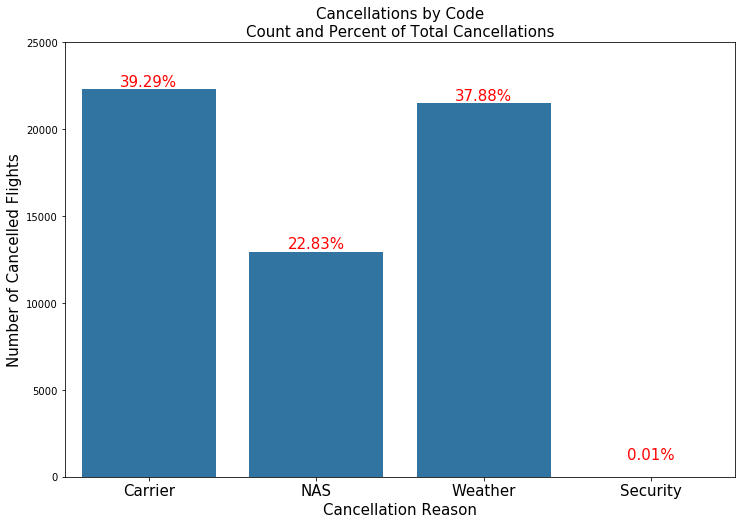

In [44]:
plt.figure(figsize=(12,8));
# Distribution of cancellation codes
ax = sb.countplot(data = df_cancelled, x = 'CancellationCode', 
             color = base_color);
plt.ylim([0, 25000])
locs, labels = plt.xticks() # get the current tick locations and labels
for loc, label in zip(locs, labels): # loop through each pair of locations and labels
    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_points)
    if count > 2000:
        # print the annotation just below the top of the bar
        plt.text(loc, count+200, pct_string, 
                 ha = 'center', color = 'r',
                fontsize=15)
    else:
        plt.text(loc, 1000, pct_string, ha = 'center', 
                 color = 'r', fontsize=15)
plt.xticks(locs, cancel_codes, fontsize=15);
plt.xlabel('Cancellation Reason', fontsize=15);
plt.ylabel('Number of Cancelled Flights',fontsize=15);
plt.title('Cancellations by Code\nCount and Percent of Total Cancellations', fontsize=15);

## Where were flights cancelled?

> Let's look a little closer at the distribution of flights and cancellations for the top 15 origin airports by flight volume.

In [ ]:
# Prep for calculations below
n_points = df.Origin.value_counts().sort_index().values
n_cancels = df[df.Cancelled==1].Origin.value_counts().sort_index().values
labels = df.Origin.value_counts().sort_index().index
locs = range(15)
locslabs = list(zip(locs, labels, n_cancels, n_points))


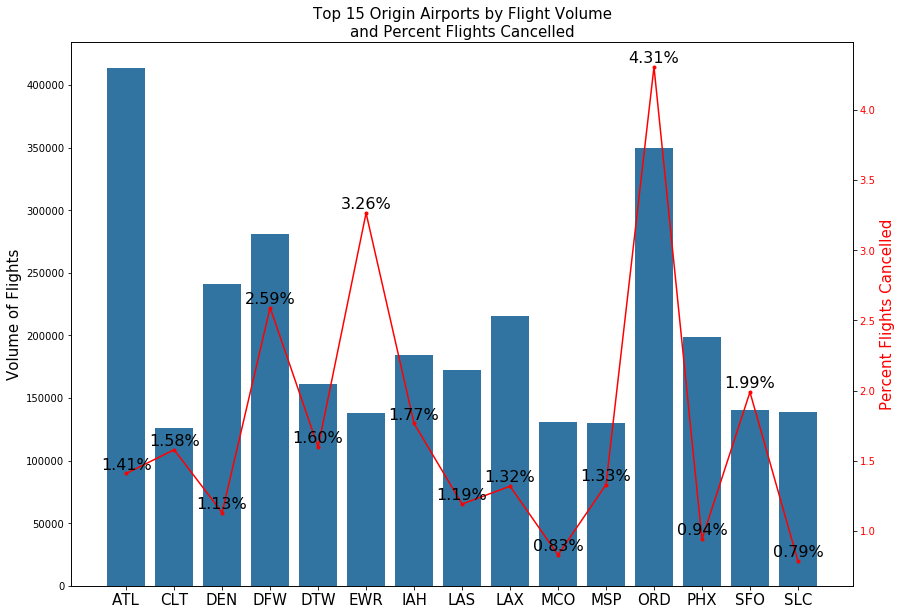

In [77]:
# Cancellations by Airports - most cancellations
# Flight Volumes
fig, ax1 = plt.subplots(figsize=(14,10))
ax1 = sb.countplot(data = df, x='Origin', 
             color = base_color, order=labels);
plt.title('Top 15 Origin Airports by Flight Volume\nand Percent Flights Cancelled', 
          fontsize=15);
ax1.set_ylabel('Volume of Flights', fontsize=15);
# Percent Cancellations
ax2 = ax1.twinx()
pct_cnl = 100*n_cancels/n_points
ax2.plot(locs, pct_cnl, color='r', marker='.');
ax2.set_ylabel("Percent Flights Cancelled", fontsize=15, color='r');
ax2.tick_params(axis='y', labelcolor='r');
for loc, pct in zip(locs, pct_cnl):
    pct_str = '{:0.2f}%'.format(pct)
    plt.text(loc, pct+0.03, pct_str, 
                ha='center', color='k',
                fontsize=16);
ax1.set_xticklabels(labels, {'fontsize': 15});
ax1.set_xlabel('', fontsize=15);

### Where were flights cancelled broken down by cancellation code?

To highlight the differences in number of cancelled flights by airport (because the previous plot mainly demonstrated volume of all flights and the percent of cancellations per airport) we will focus on only numbers of cancelled flights per airport, broken down by cancellation reasons.

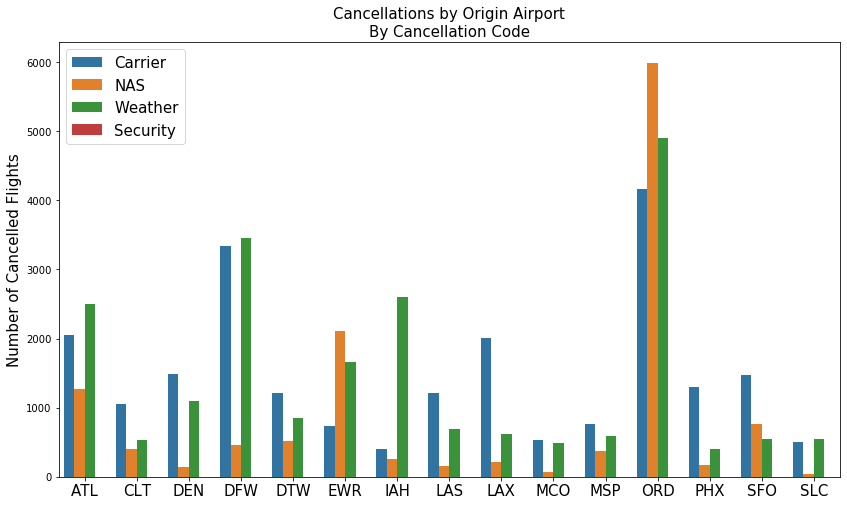

In [86]:
# Cancellations by Airports and codes - most cancellations
base_color = sb.color_palette()[0]

top = (df_cancelled.Origin.value_counts().sort_index().index)
plt.figure(figsize=(14,8))
ax = sb.countplot(data = df_cancelled, x='Origin', 
             hue = 'CancellationCode', order=top);

plt.title('Cancellations by Origin Airport\nBy Cancellation Code', fontsize=15);

plt.legend(['Carrier','NAS','Weather','Security'], fontsize=15);
plt.xticks(fontsize=15);
plt.xlabel('');
plt.ylabel('Number of Cancelled Flights', fontsize=15);

## When were flights cancelled?

> Let's take a look at the volume of flights each month and see when the most cancellations occurred.

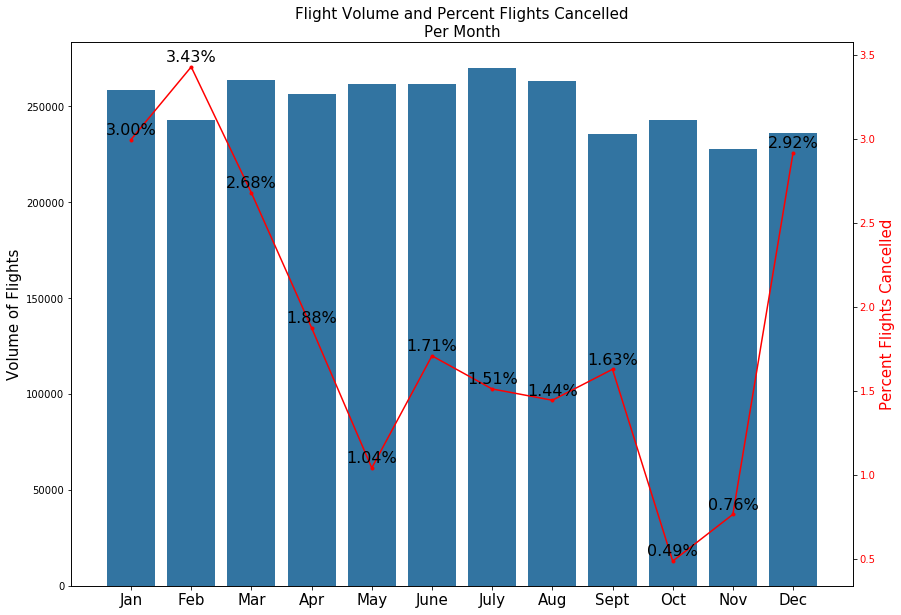

In [90]:
# Volume of flights and Percent Cancellations Per Month
# Cancellations by Airports - most cancellations
base_color = sb.color_palette()[0]

# Prep for calculations below
n_points = df.Month.value_counts().sort_index().values
n_cancels = df[df.Cancelled==1].Month.value_counts().sort_index().values
labels = df.Month.value_counts().sort_index().index
locs = range(12)
locslabs = list(zip(locs, labels, n_cancels, n_points))

# Flight Volumes
fig, ax1 = plt.subplots(figsize=(14,10))
ax1 = sb.countplot(data = df, x='Month', 
             color = base_color, order=labels);

plt.title('Flight Volume and Percent Flights Cancelled\nPer Month', 
          fontsize=15);
ax1.set_ylabel('Volume of Flights', fontsize=15);

# Percent Cancellations
ax2 = ax1.twinx()
pct_cnl = 100*n_cancels/n_points
ax2.plot(locs, pct_cnl, color='r', marker='.');
ax2.set_ylabel("Percent Flights Cancelled", fontsize=15, color='r');
ax2.tick_params(axis='y', labelcolor='r');
for loc, pct in zip(locs, pct_cnl):
    pct_str = '{:0.2f}%'.format(pct)
    plt.text(loc, pct+0.03, pct_str, 
                ha='center', color='k',
                fontsize=16);
labels = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
ax1.set_xticklabels(labels, {'fontsize': 15});
ax1.set_xlabel('', fontsize=15);

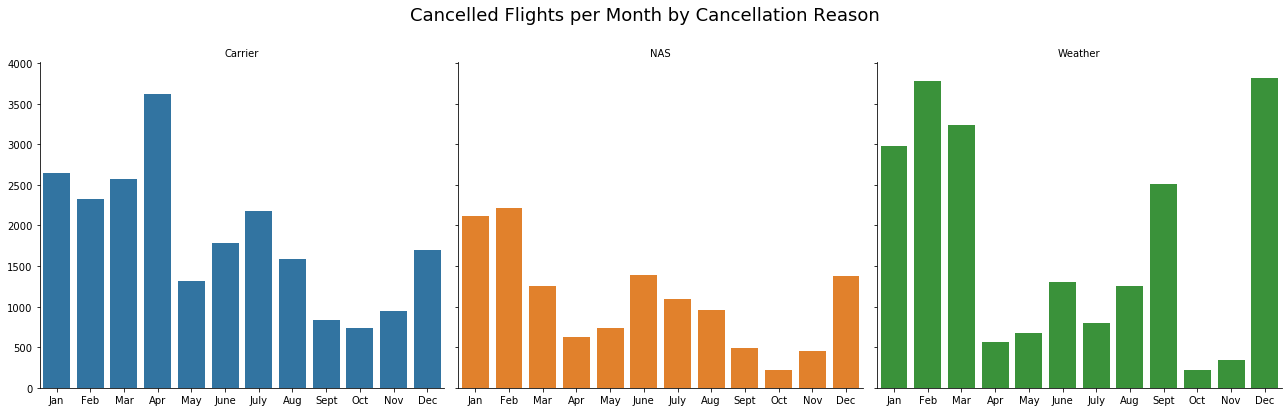

In [125]:
# Cancellation codes by month
df_cancelled['CancellationReason'] = df_cancelled['CancellationCode'].replace({'A': 'Carrier',
                                                              'B': 'Weather',
                                                               'C': 'NAS',
                                                                 'D': 'Security'})
                                                                 
g = sb.FacetGrid(df_cancelled[df_cancelled.CancellationCode.isin(['A','B','C'])], 
                 col="CancellationReason", height=6, hue='CancellationReason');

labels = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']

g = g.map(sb.countplot, "Month", 
          order=[1,2,3,4,5,6,7,8,9,10,11,12], label='big').set_titles("{col_name}", fontsize=20)\
    .set(xticklabels=labels, xlabel='')

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Cancelled Flights per Month by Cancellation Reason', fontsize=18);


## Who was flying when flights were cancelled?
> Let's take a closer look at the carriers associated with these flights and see which ones had the highest percentages of cancellations.

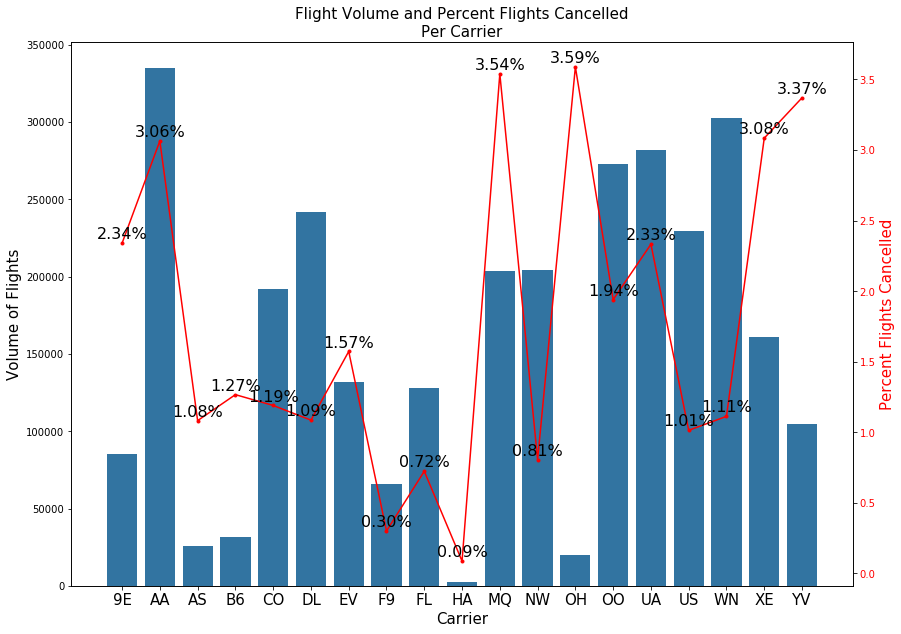

In [135]:
# Volume of flights and Percent Cancellations Per Month
# Cancellations by Airports - most cancellations
base_color = sb.color_palette()[0]

# No AQ flights have ever been cancelled, drop for now
df = df[df.UniqueCarrier!='AQ']

# Prep for calculations below
n_points = df.UniqueCarrier.value_counts().sort_index().values
n_cancels = df[df.Cancelled==1].UniqueCarrier.value_counts().sort_index().values
labels = df.UniqueCarrier.value_counts().sort_index().index
locs = range(len(df.UniqueCarrier.unique()))
locslabs = list(zip(locs, labels, n_cancels, n_points))

# Flight Volumes
fig, ax1 = plt.subplots(figsize=(14,10))
ax1 = sb.countplot(data = df, x='UniqueCarrier', 
             color = base_color, order=labels);

plt.title('Flight Volume and Percent Flights Cancelled\nPer Carrier', 
          fontsize=15);
ax1.set_ylabel('Volume of Flights', fontsize=15);

# Percent Cancellations
ax2 = ax1.twinx()
pct_cnl = 100*n_cancels/n_points
ax2.plot(locs, pct_cnl, color='r', marker='.');
ax2.set_ylabel("Percent Flights Cancelled", fontsize=15, color='r');
ax2.tick_params(axis='y', labelcolor='r');
for loc, pct in zip(locs, pct_cnl):
    pct_str = '{:0.2f}%'.format(pct)
    plt.text(loc, pct+0.03, pct_str, 
                ha='center', color='k',
                fontsize=16);
ax1.set_xticklabels(labels, {'fontsize': 15});
ax1.set_xlabel('Carrier', fontsize=15);

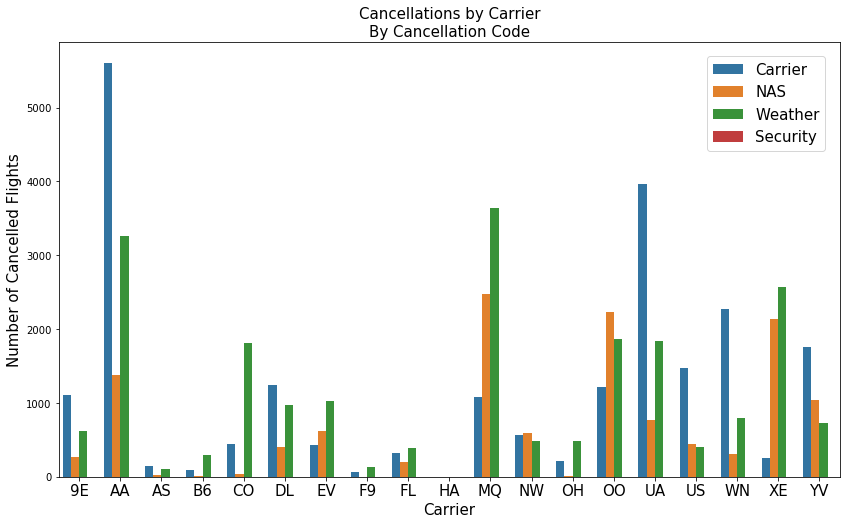

In [160]:
# Cancellations by Carriers and codes 
base_color = sb.color_palette()[0]

plt.figure(figsize=(14,8))
ax = sb.countplot(data = df_cancelled, x='UniqueCarrier', 
             hue = 'CancellationReason', order=df_cancelled.UniqueCarrier.value_counts().sort_index().index);
plt.title('Cancellations by Carrier\nBy Cancellation Code', fontsize=15);
plt.xticks(fontsize= 15);
plt.xlabel('Carrier', fontsize=15);
plt.legend(fontsize=15, loc=[.83,.75]);
plt.ylabel('Number of Cancelled Flights', fontsize=15);

## When, where, who, and why??

> Tracking backwards through the above analyses we see that carriers ``AA, CO, MQ, OO, UA, and XE`` have the greatest volumes of cancelled flights, especially when it comes to weather cancellations. Some of these correspond with the carriers that have the highest percentages of cancelled flights relative to their typical volume of flights: ``AA, MQ, OO, UA, and XE``, as well as some carriers which simply have high percentages of cancelled flights: ``9E, EV, OH, and YV``, but small volumes. 

> From these carriers, we can link them back to specific origin airports that support flights from the higher cancellation percentage carriers.

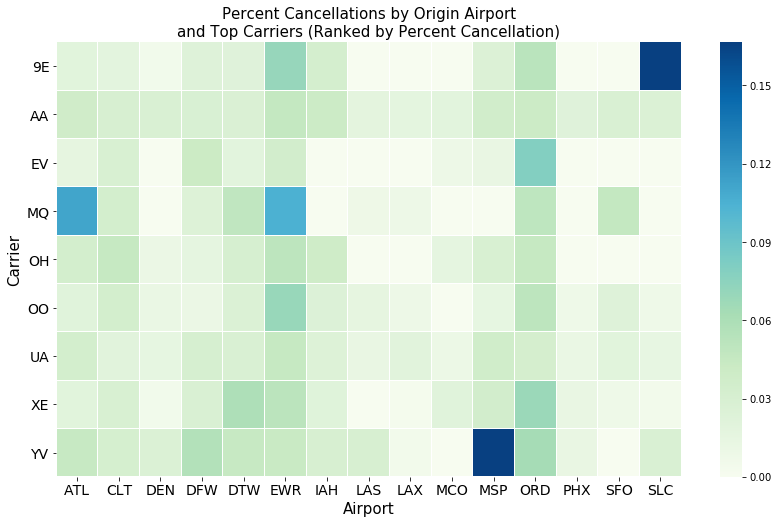

In [171]:
# Percent Cancellations by Origin and Top Cancellation Percentages Carriers
df_sub = df[df.UniqueCarrier.isin(['9E','AA','EV','MQ','OH','OO','UA','XE','YV'])][['UniqueCarrier','Origin','Cancelled']]

plt.figure(figsize=(14,8))
df_subpiv = df_sub.pivot_table(index='UniqueCarrier', columns='Origin', 
                               values='Cancelled', fill_value=0)
sb.heatmap(df_subpiv, cmap='GnBu', linewidths=0.01);
plt.title('Percent Cancellations by Origin Airport\nand Top Carriers (Ranked by Percent Cancellation)', fontsize=15);
plt.xlabel('Airport', fontsize=15);
plt.ylabel('Carrier', fontsize=15);
plt.yticks(rotation=0, fontsize=14);
plt.xticks(fontsize=14);

### Narrowing in further on Who, Where, Why, and When
> Taking the leading airport and carrier combinations based on percent cancellations from above we have: 
* ATL and MQ
* EWR and MQ or 9E
* MSP and YV
* ORD and XE or EV
* SLC and 9E

> With clear higher percentages across carriers at ``ATL, CLT, EWR, and ORD`` *and* overall high percentages across airports for carrier ``AA``. 

> Let's examine what time of year these high cancellation combinations occur:

In [172]:
df_sub = df.copy()
df_sub['OrgCar'] = df_sub['Origin'] + '_' + df_sub['UniqueCarrier']
badcombos = ['ATL_MQ', 'EWR_MQ', 'EWR_9E', 'MSP_YV', 'ORD_XE', 'ORD_EV', 'SLC_9E']
df_sub = df_sub[df_sub.OrgCar.isin(badcombos)]

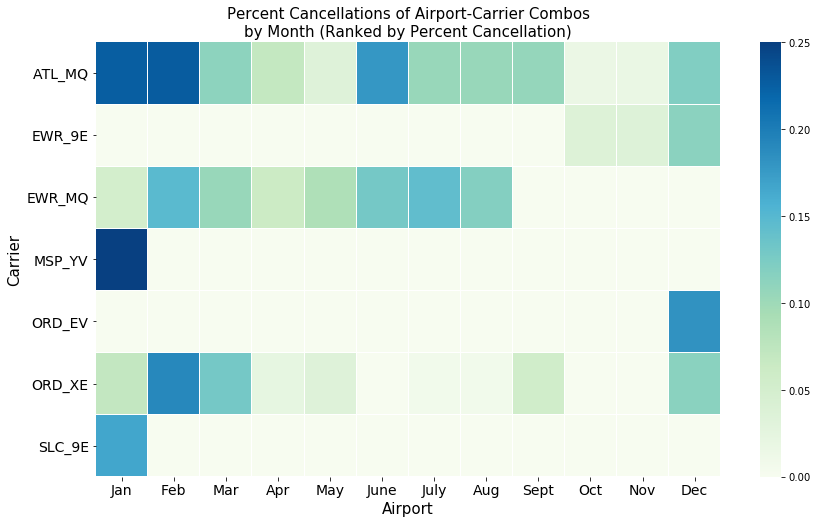

In [191]:
plt.figure(figsize=(14,8))
df_subpiv = df_sub.pivot_table(index='OrgCar', columns='Month', 
                               values='Cancelled', fill_value=0)
sb.heatmap(df_subpiv, cmap='GnBu', linewidths=0.01);
plt.title('Percent Cancellations of Airport-Carrier Combos\nby Month (Ranked by Percent Cancellation)', fontsize=15);
plt.xlabel('Airport', fontsize=15);
plt.ylabel('Carrier', fontsize=15);
plt.yticks(rotation=0, fontsize=14);
labels = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.xticks(np.arange(.5, 12.5, 1), labels, fontsize=14);

## Lastly, the Why of the When, Who, and Where
> To bring everything full circle, let's look at why those flights were cancelled for the airport-carrier combinations during the months of approximately December through March.

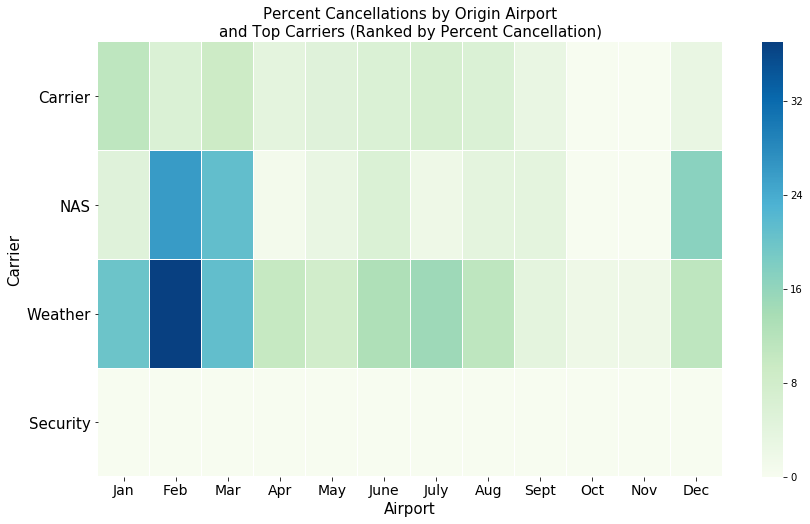

In [192]:
plt.figure(figsize=(14,8))
df_subpiv = df_sub.pivot_table(columns='Month', index='CancellationCode', 
                               values='Cancelled', fill_value=0, aggfunc='sum')
sb.heatmap(df_subpiv, cmap='GnBu', linewidths=0.01);
plt.title('Percent Cancellations by Origin Airport\nand Top Carriers (Ranked by Percent Cancellation)', fontsize=15);
plt.xlabel('Airport', fontsize=15);
plt.ylabel('Carrier', fontsize=15);
plt.yticks(rotation=0, fontsize=14);
labels = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.xticks(np.arange(.5, 12.5, 1), labels, fontsize=14);
plt.yticks(np.arange(.5, 4.5, 1), ['Carrier','NAS','Weather','Security'], fontsize=15);

## Conclusion: Weather!
> The trick is that even NAS can refer to weather - it's one of the five possible sub-reasons associated with National Airport Services cancellations. Overall, the flights that had the highest chances of cancellations were those on specific carriers departing from bad weather-prone airports (such as Atlanta (with the hurricanes) and Chicago (with the snow storms)) during typically bad weather months (such as winter). Luckily, the total number of cancellations represented such a small percentage of the full volume of flights scheduled in 2008. However, this analysis does suggest that it could be relatively simple to avoid at least some cancelled flights in the future by staying away from flying when you find yourself at any of these airports and the forecast looks ominous. 

### Thank you and stay dry!
**Carlie Badder**
Udacity Analytics Nanodegree

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!